Abdullah Ihsan Ghauri
SP23-BAI-002

In [3]:
import torch
import torch.nn as nn

def generate_random_regression_data(n_samples = 200 ):
      X = torch.randn(n_samples,10)
      true_weights = torch.tensor([[2.0],[-1.5],[3.0],[4.0],[1.2],[2.3],[-2.0],[3.4],[1.7],[4.7]])
      y = torch.mm(X ,true_weights) + 5 +torch.randn(n_samples,1) * 0.001

      return X,y


X_train , Y_train = generate_random_regression_data(n_samples=200)

Custom Defining linear layers


In [12]:
class CustomLinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(input_size, output_size, dtype=torch.float32) * 0.1)
        self.bias = nn.Parameter(torch.zeros(output_size, dtype=torch.float32))

    def forward(self, x):
        # computing X.W + b
        return x @ self.weights + self.bias

Custom Neural Network

In [13]:
class CustomNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = CustomLinearLayer(10, 24)
        self.layer2 = CustomLinearLayer(24, 8)
        self.layer3 = CustomLinearLayer(8, 1)

    def forward(self, x):
        x1 = self.layer1(x)
        a1 = torch.relu(x1)
        x2 = self.layer2(a1)
        a2 = torch.relu(x2)
        output = self.layer3(a2)
        return output


In [10]:
import torch.optim as optim
import matplotlib.pyplot as plt

In [18]:
from torch.utils.data import DataLoader, TensorDataset

model = CustomNeuralNetwork()
train_dataset = TensorDataset(X_train, Y_train)


loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


def train_model(model, train_data, n_epoch, batch_size, loss_fn, optimizer):

      train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
      losses = []

      for epoch in range(num_epochs):
        for  x_batch, y_batch in train_loader:
            model.train()

            predictions = model(x_batch)
            loss = loss_fn(predictions, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.item())


            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

        return model,losses

In [32]:
model7 = CustomNeuralNetwork()
optimizer7 = optim.SGD(model7.parameters(), lr=0.001)
num_epochs = 50
batch_size = len(train_dataset)


MBG_model,MBG_losses = train_model(model7, train_dataset, num_epochs, batch_size, loss_fn, optimizer7)

Epoch [1/50], Loss: 93.1556


In [20]:
num_epochs = 50
batch_size = 1
model2 = CustomNeuralNetwork()
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.001)

S_model,S_losses = train_model(model2, train_dataset, num_epochs, batch_size, loss_fn, optimizer2)

Epoch [1/50], Loss: 231.7676
Epoch [1/50], Loss: 138.6059
Epoch [1/50], Loss: 151.9732
Epoch [1/50], Loss: 28.6518
Epoch [1/50], Loss: 244.7056
Epoch [1/50], Loss: 38.7224
Epoch [1/50], Loss: 82.5169
Epoch [1/50], Loss: 89.6272
Epoch [1/50], Loss: 422.3127
Epoch [1/50], Loss: 395.9558
Epoch [1/50], Loss: 39.7288
Epoch [1/50], Loss: 154.8733
Epoch [1/50], Loss: 21.1626
Epoch [1/50], Loss: 132.3371
Epoch [1/50], Loss: 0.0641
Epoch [1/50], Loss: 21.9482
Epoch [1/50], Loss: 188.4161
Epoch [1/50], Loss: 52.7286
Epoch [1/50], Loss: 6.9493
Epoch [1/50], Loss: 85.3525
Epoch [1/50], Loss: 24.8106
Epoch [1/50], Loss: 4.6432
Epoch [1/50], Loss: 48.5007
Epoch [1/50], Loss: 27.3710
Epoch [1/50], Loss: 239.9433
Epoch [1/50], Loss: 56.3634
Epoch [1/50], Loss: 73.0208
Epoch [1/50], Loss: 43.1055
Epoch [1/50], Loss: 6.3708
Epoch [1/50], Loss: 3.2795
Epoch [1/50], Loss: 16.6714
Epoch [1/50], Loss: 1.1792
Epoch [1/50], Loss: 3.0383
Epoch [1/50], Loss: 4.3596
Epoch [1/50], Loss: 332.7551
Epoch [1/50], Los

In [33]:
model8 = CustomNeuralNetwork()
optimizer8 = optim.SGD(model8.parameters(), lr=0.001)
num_epochs = 50
batch_size = len(train_dataset)


GD_model,GD_losses = train_model(model8, train_dataset, num_epochs, batch_size, loss_fn, optimizer8)

Epoch [1/50], Loss: 93.4865


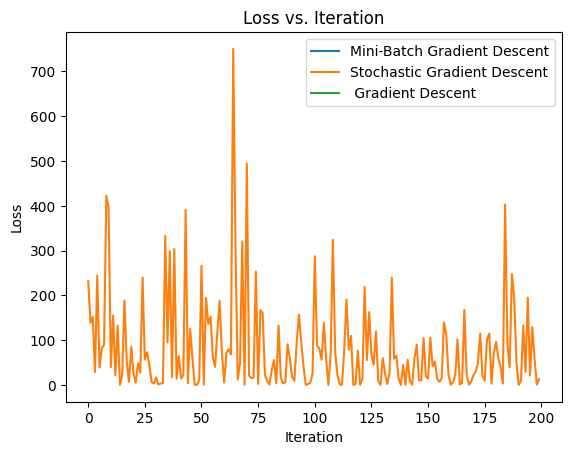

In [36]:

plt.plot(MBG_losses, label='Mini-Batch Gradient Descent')
plt.plot(S_losses, label='Stochastic Gradient Descent')
plt.plot(GD_losses, label=' Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.show()

CNN PART

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [38]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3), (50000, 1)
Test data shape: (10000, 32, 32, 3), (10000, 1)


In [39]:

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('After reshpaing: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

After reshpaing:  (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [49]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,290 (598.79 KB)

 Trainable params: 153,290 (598.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2078 - loss: 2.1210 - val_accuracy: 0.4098 - val_loss: 1.6713
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3791 - loss: 1.6997 - val_accuracy: 0.4613 - val_loss: 1.5194
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4350 - loss: 1.5579 - val_accuracy: 0.4875 - val_loss: 1.4373
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4685 - loss: 1.4673 - val_accuracy: 0.5033 - val_loss: 1.3784
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4918 - loss: 1.4135 - val_accuracy: 0.5275 - val_loss: 1.3336
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5048 - loss: 1.3817 - val_accuracy: 0.5510 - val_loss: 1.2842
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5293 - loss: 1.3255 - val_accuracy: 0.5514 - val_loss: 1.2652
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5332 - loss: 1.3011 - 

In [48]:

model = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (4, 4), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (4, 4), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history2 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=64 ,
    verbose=1
)

loss2, accuracy2 = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 64)            │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,306 (1.52 MB)

 Trainable params: 399,306 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2311 - loss: 2.0728 - val_accuracy: 0.4143 - val_loss: 1.6483
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4014 - loss: 1.6453 - val_accuracy: 0.4719 - val_loss: 1.4614
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4545 - loss: 1.4997 - val_accuracy: 0.5105 - val_loss: 1.3696
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4892 - loss: 1.4085 - val_accuracy: 0.5359 - val_loss: 1.3068
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5141 - loss: 1.3498 - val_accuracy: 0.5616 - val_loss: 1.2461
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5443 - loss: 1.2806 - val_accuracy: 0.5753 - val_loss: 1.2005
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5580 - loss: 1.2398 - val_accuracy: 0.5974 - val_loss: 1.1634
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5752 - loss: 1.2031 - val_accuracy: 0.

In [47]:

model = Sequential([
    Conv2D(8, (2, 2), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(8, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(8, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

history3 = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=8 ,
    verbose=1
)

loss3, accuracy3 = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 8)           │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 8)           │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 8)             │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,434 (72.01 KB)

 Trainable params: 18,434 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.1738 - loss: 2.1923 - val_accuracy: 0.3375 - val_loss: 1.9013
Epoch 2/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3082 - loss: 1.8895 - val_accuracy: 0.3924 - val_loss: 1.7213
Epoch 3/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.3623 - loss: 1.7501 - val_accuracy: 0.4161 - val_loss: 1.6447
Epoch 4/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3847 - loss: 1.6833 - val_accuracy: 0.4320 - val_loss: 1.5867
Epoch 5/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4014 - loss: 1.6414 - val_accuracy: 0.4434 - val_loss: 1.5561
Epoch 6/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4136 - loss: 1.6025 - val_accuracy: 0.4560 - val_loss: 1.5158
Epoch 7/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.4325 - loss: 1.5633 - val_accuracy: 0.4628 - val_loss: 1.4976
Epoch 8/15
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4447 - loss: 1

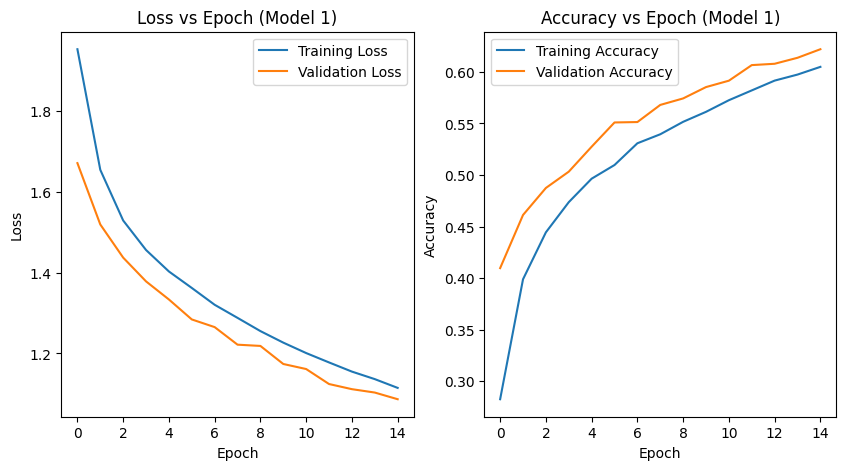

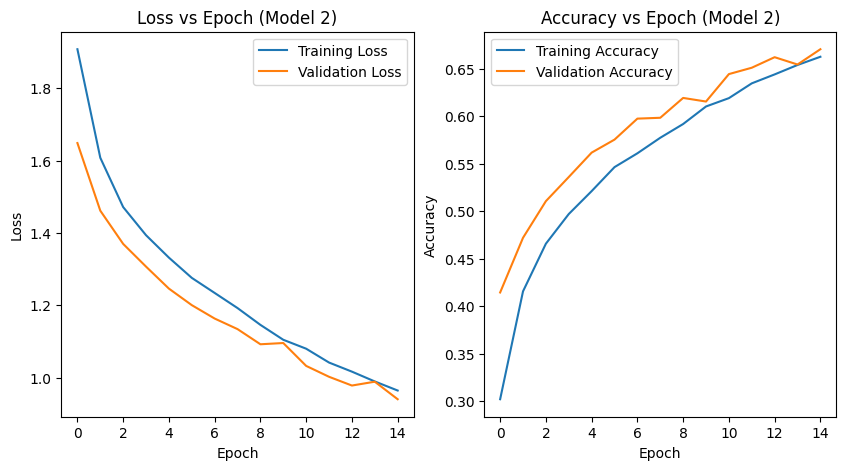

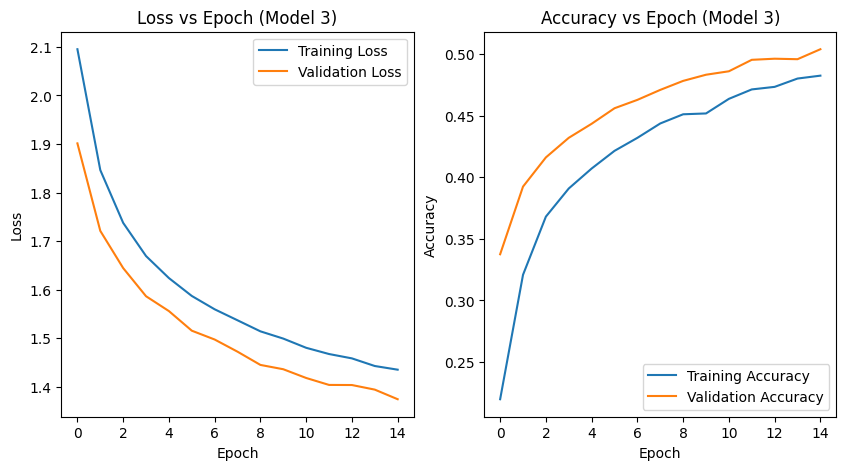

In [51]:


#Plot for the first model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 1)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 1)')
plt.legend()
plt.show()


# Plot for the second model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 2)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 2)')
plt.legend()
plt.show()

# Plot for the third model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (Model 3)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch (Model 3)')
plt.legend()
plt.show()